In [35]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import math
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-02 10:34:38,427: Credentials are already in use. The existing account in the session will be replaced.


In [36]:
pi = math.pi

def  controlled_controlled_controlled_Z(circuit , control1 , control2, control3 , target):
    """ Implement a CCZ gate  with a single  control """
    circuit.cu1(pi/4, control1, target)
    circuit.cx(control1, control2)
    circuit.cu1(-pi/4, control2, target)
    circuit.cx(control1, control2)
    circuit.cu1(pi/4, control2, target)
    circuit.cx(control2, control3)
    circuit.cu1(-pi/4, control3, target)
    circuit.cx(control1, control3)
    circuit.cu1(pi/4, control3, target)
    circuit.cx(control2, control3)
    circuit.cu1(-pi/4, control3, target)
    circuit.cx(control1, control3)
    circuit.cu1(pi/4, control3, target)

In [37]:
def  phase_oracle_1111(circuit , registers):
    controlled_controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2], registers[3])
    
def  phase_oracle_1110(circuit , registers):
    circuit.x(registers[3])
    controlled_controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2], registers [3])
    circuit.x(registers[3])
    
def  phase_oracle_1101(circuit , registers):
    circuit.x(registers[2])
    controlled_controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2], registers [3])
    circuit.x(registers[2])
    
def  phase_oracle_1011(circuit , registers):
    circuit.x(registers[1])
    controlled_controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2], registers [3])
    circuit.x(registers[1])

In [38]:
def  grover_diffusion(circuit , registers):
    #Apply  Hadamard  and X gates  on all  qubits
    circuit.h(registers)
    circuit.x(registers)
    
    #Create a barrier  that  isolates  different  sections  of the circuit
    circuit.barrier ()
    
    # Apply  CZ gate  with  target  as  qubit 
    controlled_controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2], registers [3])
    
    circuit.barrier ()
    
    circuit.x(registers)
    circuit.h(registers)

In [39]:
# Run  phase  oracle  and  diffusion  operators.
def run_tests(tests, groverCircuit, qr):
    for test in range(tests):
        groverCircuit.barrier()
        if(state_to_search == '1111'):
            phase_oracle_1111(groverCircuit, qr)
        elif(state_to_search == '1110'):
            phase_oracle_1110(groverCircuit, qr)
        elif(state_to_search == '1101'):
            phase_oracle_1101(groverCircuit, qr)
        elif(state_to_search == '1011'):
            phase_oracle_1011(groverCircuit, qr)
        groverCircuit.barrier()
        grover_diffusion(groverCircuit, qr)

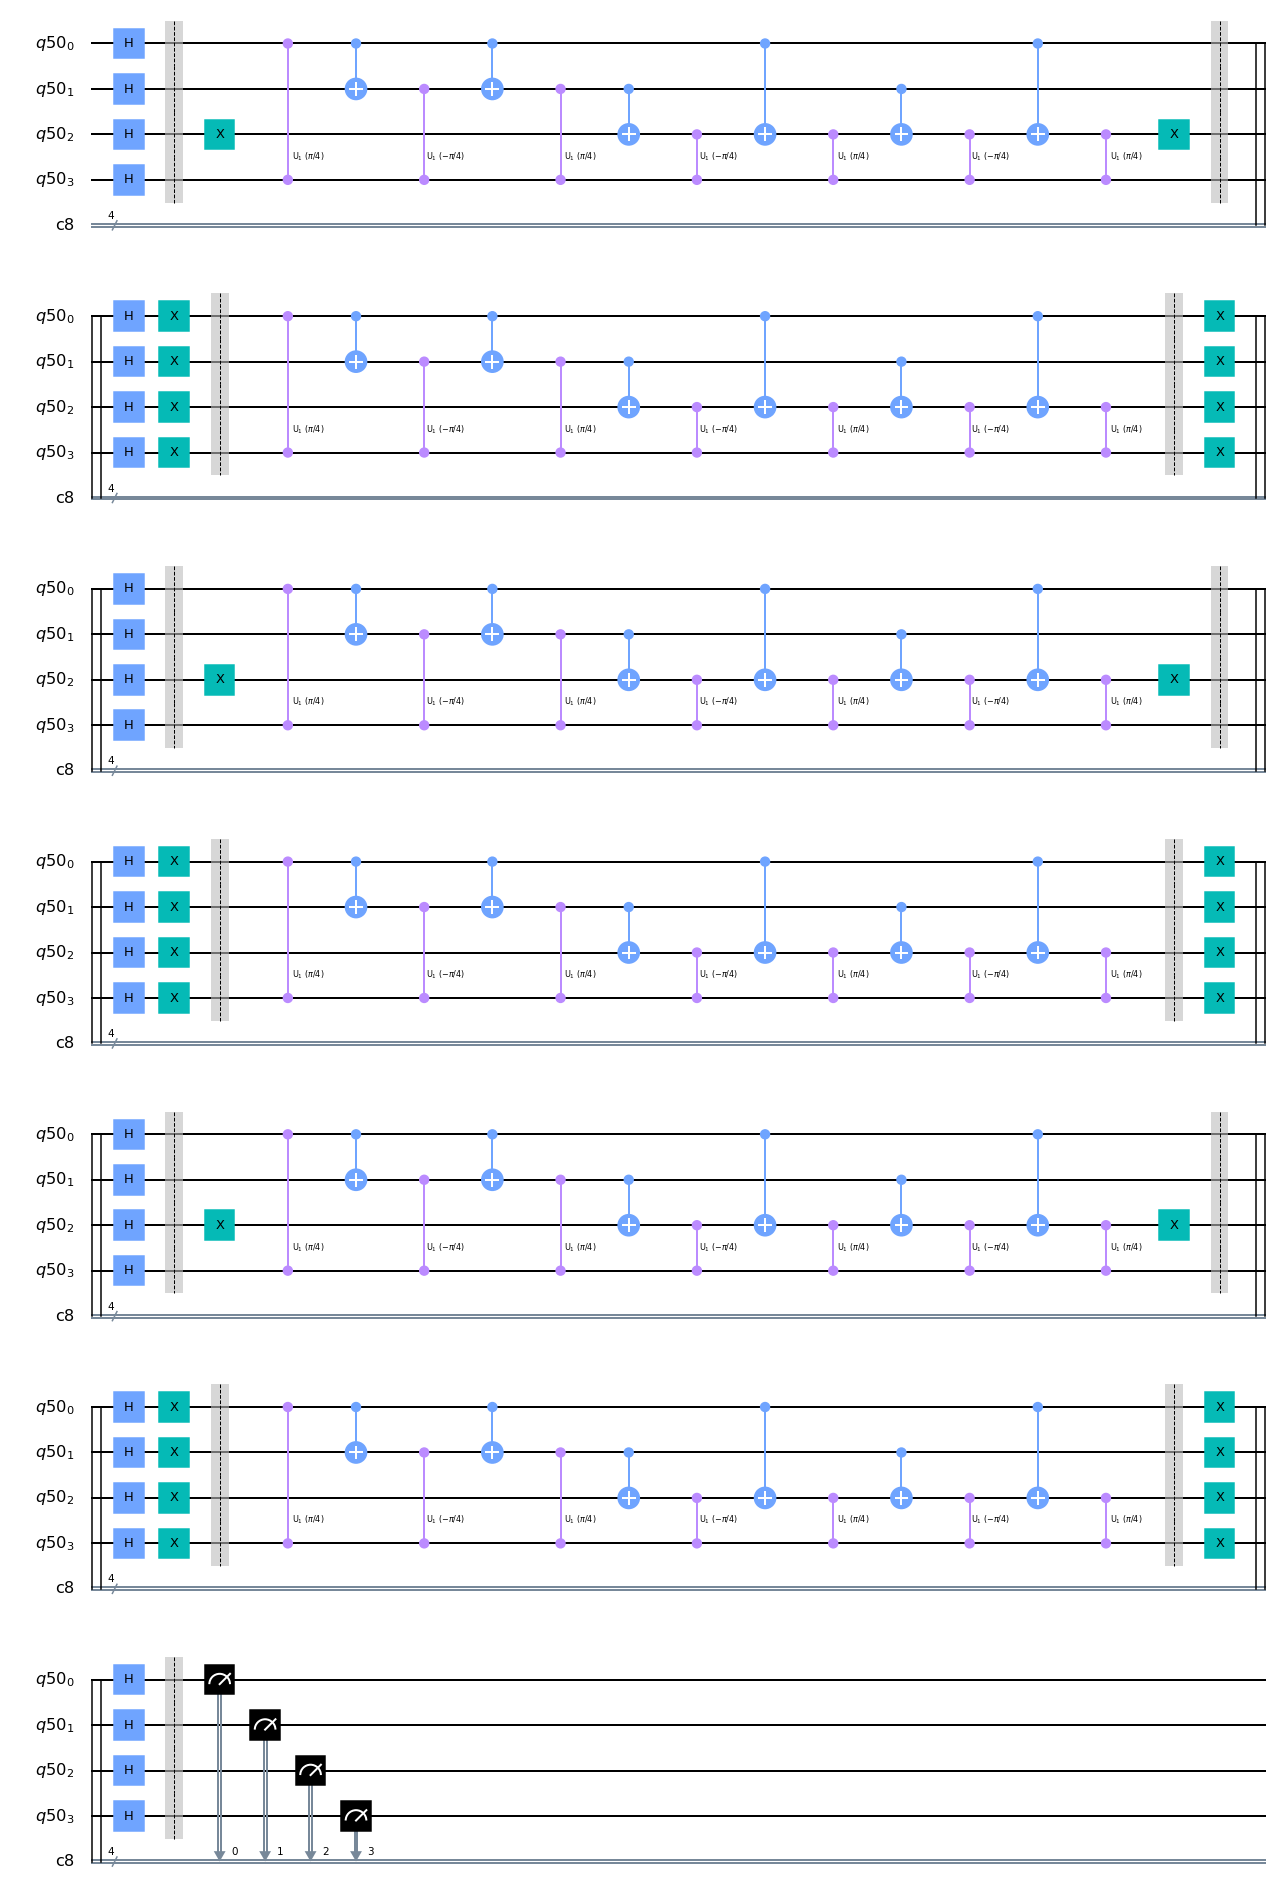

In [46]:
#Define  circuit  constants
Qubits = 4
tests = 3
state_to_search='1011'

#Define  register  objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr,cr)

#Initialize  circuit  with  Hadamard  gates
groverCircuit.h(qr)

#Run tests
run_tests(tests, groverCircuit, qr)
    
#Measure  quantum  registers
groverCircuit.barrier ()
groverCircuit.measure(qr ,cr)

#Draw  Circuit
groverCircuit.draw(output="mpl")

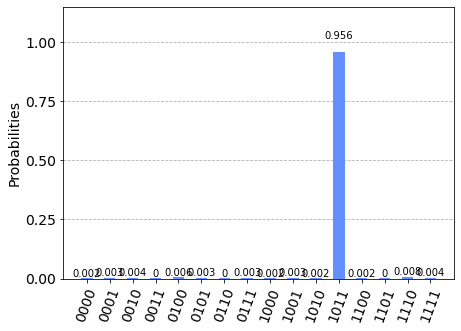

In [47]:
#Defind  backend  that  will  simulate  quantum  circuit  qasm_simulator 
backend = BasicAer.get_backend('qasm_simulator')

#Number  of  times  the  circuit  is run
shots = 1024

#Execute  circuit  and  plot  results  on  histogram
results = execute(groverCircuit , backend=backend , shots=shots).result()
answer = results.get_counts ()
plot_histogram(answer)